In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.utils import shuffle

from svm_linear_classifier import SVMClassifier

In [2]:
iris = datasets.load_iris()
X =  iris.data[:, [2, 3]] # we only take the first two features.
y = pd.DataFrame(iris.target, columns=['y'])

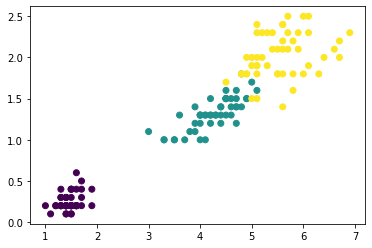

In [3]:
plt.scatter(X[:,0],X[:,1],c = y.to_numpy())

## Preprocessing

#### seperating output multiclasses column to binary outputs

In [4]:
y.y = y.y.astype(str)
y = pd.get_dummies(y, drop_first = False).to_numpy()

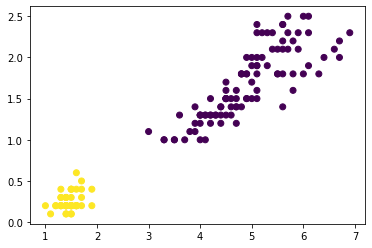

In [5]:
plt.scatter(X[:,0],X[:,1],c = y[:, 0])

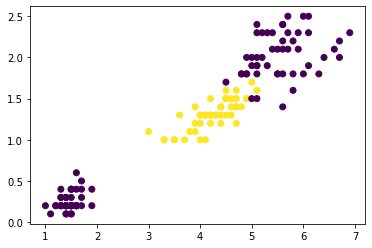

In [6]:
plt.scatter(X[:,0],X[:,1],c = y[:, 1])

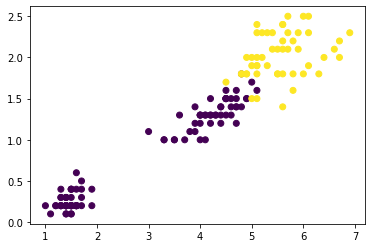

In [7]:
plt.scatter(X[:,0],X[:,1],c = y[:, 2])

#### splitting the data

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size = 0.3)

In [59]:
y_train_0, y_train_1, y_train_2 = y_train[:, 0], y_train[:, 1], y_train[:, 2]

In [60]:
y_tst_0, y_tst_1, y_tst_2 = y_tst[:, 0], y_tst[:, 1], y_tst[:, 2]

## Training and evaluation

In [11]:
clf_0 = SVMClassifier(eta = 0.000001, C = 10000, n_iterations = 20000)
clf_0.fit(X_train, y_train_0)

In [39]:
y_pred_0 = clf_0.predict(X_tst)
y_pred_0

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1])

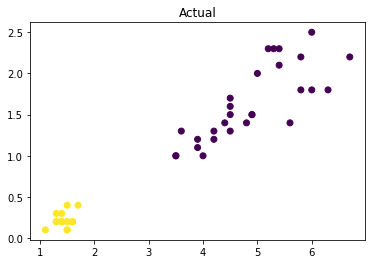

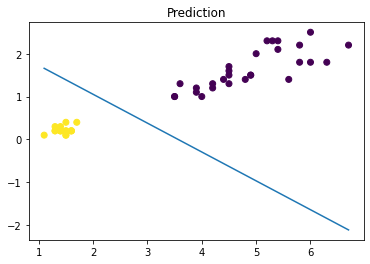

In [13]:
clf_0.visualize_2D(X_tst, y_tst_0)

In [14]:
f1_score(y_pred_0, y_tst_0.reshape(-1))

1.0

In [15]:
accuracy_score(y_pred_0, y_tst_0.reshape(-1))

1.0

In [16]:
clf_1 = SVMClassifier(eta = 0.000001, C = 10000, n_iterations = 20000)
clf_1.fit(X_train, y_train_1)

In [17]:
y_pred_1 = clf_1.predict(X_tst)
y_pred_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

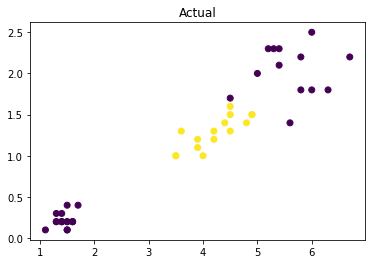

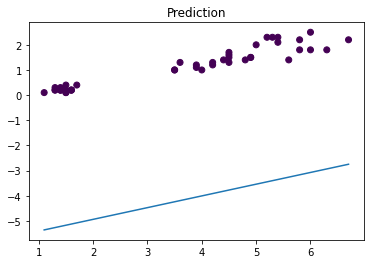

In [18]:
clf_1.visualize_2D(X_tst, y_tst_1)

In [19]:
f1_score(y_pred_1, y_tst_1.reshape(-1))

0.0

In [20]:
accuracy_score(y_pred_1, y_tst_1.reshape(-1))

0.6666666666666666

In [21]:
clf_2 = SVMClassifier(eta = 0.000001, C = 10000, n_iterations = 20000)
clf_2.fit(X_train, y_train_2)

In [22]:
y_pred_2 = clf_2.predict(X_tst)
y_pred_2

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0])

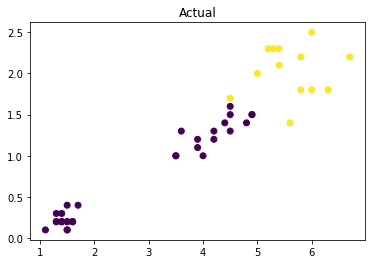

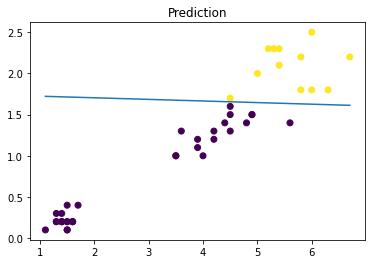

In [23]:
clf_2.visualize_2D(X_tst, y_tst_2)

In [24]:
f1_score(y_pred_2, y_tst_2.reshape(-1))

0.9600000000000001

In [25]:
accuracy_score(y_pred_2, y_tst_2.reshape(-1))

0.9777777777777777

we can make predictions using ```clf_0``` and ```clf_2``` only, if the prediciton for the two classifiers is 0 then the point should be the third class '1'